In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [206]:
df_data = pd.read_csv("../../data/external/paper_dic24/Prova_salto_nuova/18_12_Detail_C1.5.csv", skiprows=3)
df_t_amb = pd.read_csv("../../data/external/paper_dic24/Prova_salto_nuova/18_12_Detail_Ambiente_Camera.csv", skiprows=3)

In [207]:
columns_to_drop = ['Description', 'Step', 'Cycle', 'Loop']

In [208]:
df_data = df_data.drop(columns=columns_to_drop)

In [209]:
df_data.head()

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T17a
0,2024/12/18 10:42:09,10,4.1245,0.0,0.0,0.0,0.0,0.0,39.1814
1,2024/12/18 10:42:09,110,4.1245,0.0,0.0,0.0,0.0,0.0,39.1809
2,2024/12/18 10:42:09,210,4.1245,0.0,0.0,0.0,0.0,0.0,39.0839
3,2024/12/18 10:42:09,310,4.1245,0.0,0.0,0.0,0.0,0.0,39.0839
4,2024/12/18 10:42:09,410,4.1245,0.0,0.0,0.0,0.0,0.0,39.1566


In [210]:
df_t_amb = df_t_amb[['TEST TIME', 'DWell Time(ms)', 'T13a']]

In [211]:
df_t_amb

,TEST TIME,DWell Time(ms),T13a
0,2024/12/18 10:42:01,10,38.7472
1,2024/12/18 10:42:02,1010,38.7584
2,2024/12/18 10:42:03,2010,38.7973
3,2024/12/18 10:42:04,3010,38.8400
4,2024/12/18 10:42:05,4010,38.7906
...,...,...,...
71996,2024/12/19 06:41:57,71996010,11.0709
71997,2024/12/19 06:41:58,71997010,11.0831
71998,2024/12/19 06:41:59,71998010,11.1620
71999,2024/12/19 06:42:00,71999010,11.1704


In [212]:
# Allineo T_amb e dataset perché il dataset inizia prima di t_amb
df_t_amb[df_t_amb['TEST TIME'] == df_data['TEST TIME'][0]]

,TEST TIME,DWell Time(ms),T13a
8,2024/12/18 10:42:09,8010,38.7318


In [213]:
df_t_amb.iloc[6:10]

,TEST TIME,DWell Time(ms),T13a
6,2024/12/18 10:42:07,6010,38.6615
7,2024/12/18 10:42:08,7010,38.7042
8,2024/12/18 10:42:09,8010,38.7318
9,2024/12/18 10:42:10,9010,38.6628


In [214]:
df_t_amb['DWell Time(ms)'] = df_t_amb['DWell Time(ms)'] - 8000
df_t_amb = df_t_amb[8:]

In [215]:
df_t_amb

,TEST TIME,DWell Time(ms),T13a
8,2024/12/18 10:42:09,10,38.7318
9,2024/12/18 10:42:10,1010,38.6628
10,2024/12/18 10:42:11,2010,38.7579
11,2024/12/18 10:42:12,3010,38.7648
12,2024/12/18 10:42:13,4010,38.7758
...,...,...,...
71996,2024/12/19 06:41:57,71988010,11.0709
71997,2024/12/19 06:41:58,71989010,11.0831
71998,2024/12/19 06:41:59,71990010,11.1620
71999,2024/12/19 06:42:00,71991010,11.1704


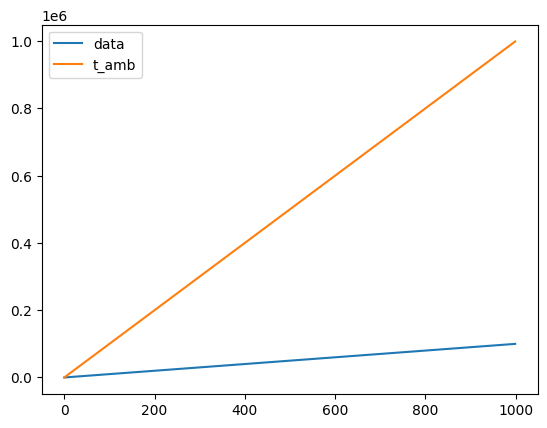

In [216]:
signal_len = 1000 #len(df_data)

plt.plot(range(0, signal_len), df_data['DWell Time(ms)'][:signal_len], label='data')
plt.plot(range(0, signal_len), df_t_amb['DWell Time(ms)'][:signal_len], label='t_amb')
plt.legend()

In [217]:
dt_t_amb = [t2 - t1 for t2,t1 in zip(df_t_amb['DWell Time(ms)'][1:], df_t_amb['DWell Time(ms)'])]

In [218]:
# Sistemo i dati
df_data[df_data.duplicated(['TEST TIME'])]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T17a
1,2024/12/18 10:42:09,110,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1809
2,2024/12/18 10:42:09,210,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.0839
3,2024/12/18 10:42:09,310,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.0839
4,2024/12/18 10:42:09,410,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1566
5,2024/12/18 10:42:09,510,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1566
...,...,...,...,...,...,...,...,...,...
89317,2024/12/18 18:57:07,29697870,3.7630,4.0091,0.0000,-7.0224,15.086108,0.000000,11.8933
90510,2024/12/18 19:16:59,30890200,3.9000,4.0307,1.3282,-5.6942,15.719720,0.005117,12.3462
90511,2024/12/18 19:16:59,30890210,3.8610,-3.9879,0.0000,-5.6942,-15.397301,0.000000,12.3462
91712,2024/12/18 19:36:59,32090210,3.7630,4.0101,0.0000,-7.0246,15.089803,0.000000,12.1934


In [219]:
df_data.drop_duplicates(['TEST TIME'], keep='last', inplace=True, ignore_index=True)

In [220]:
df_data

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T17a
0,2024/12/18 10:42:09,710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1870
1,2024/12/18 10:42:10,1710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1651
2,2024/12/18 10:42:11,2710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1881
3,2024/12/18 10:42:12,3710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1379
4,2024/12/18 10:42:13,4710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1873
...,...,...,...,...,...,...,...,...,...
33269,2024/12/18 19:56:38,33269210,3.8994,4.0099,1.3132,-5.7114,15.636117,0.005058,11.8670
33270,2024/12/18 19:56:39,33270210,3.8994,4.0124,1.3143,-5.7103,15.646045,0.005062,11.9293
33271,2024/12/18 19:56:40,33271210,3.8996,4.0112,1.3155,-5.7092,15.642228,0.005067,12.0148
33272,2024/12/18 19:56:41,33272210,3.8996,4.0112,1.3166,-5.7081,15.642356,0.005071,11.8866


In [221]:
dt_data = [t2 - t1 for t2,t1 in zip(df_data['DWell Time(ms)'][1:], df_data['DWell Time(ms)'])]

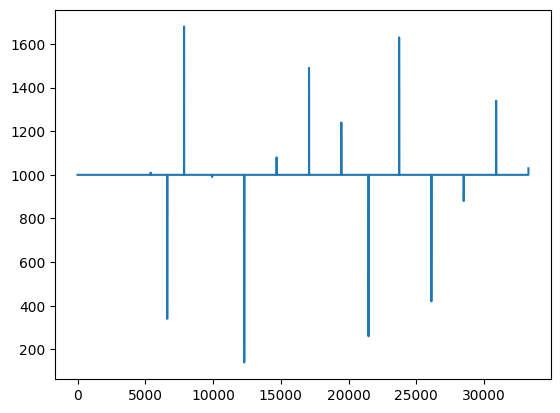

In [222]:
plt.plot(dt_data)

In [223]:
[dt_data.index(elem) for elem in dt_data if elem != 1000]

[5399,
 6620,
 7860,
 9934,
 12302,
 14690,
 17082,
 19464,
 21474,
 23731,
 26111,
 28497,
 30889,
 33272]

In [224]:
df_data.loc[7858:7862] 

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T17a
7858,2024/12/18 12:53:07,7858060,3.8990,4.0063,0.0412,-4.6786,15.620447,0.000160,41.2262
7859,2024/12/18 12:53:08,7859060,3.8993,4.0065,0.0423,-4.6775,15.622457,0.000165,41.1547
7860,2024/12/18 12:53:09,7860060,3.8994,4.0060,0.0434,-4.6764,15.621310,0.000169,41.1994
7861,2024/12/18 12:53:10,7861740,3.8829,-3.9934,0.0000,-4.6745,-15.506187,0.000000,41.1849
7862,2024/12/18 12:53:11,7862740,3.8811,-3.9945,-0.0011,-4.6757,-15.502997,-0.000004,41.1745


In [225]:
df_data.tail()

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T17a
33269,2024/12/18 19:56:38,33269210,3.8994,4.0099,1.3132,-5.7114,15.636117,0.005058,11.8670
33270,2024/12/18 19:56:39,33270210,3.8994,4.0124,1.3143,-5.7103,15.646045,0.005062,11.9293
33271,2024/12/18 19:56:40,33271210,3.8996,4.0112,1.3155,-5.7092,15.642228,0.005067,12.0148
33272,2024/12/18 19:56:41,33272210,3.8996,4.0112,1.3166,-5.7081,15.642356,0.005071,11.8866
33273,2024/12/18 19:56:42,33273240,3.9000,4.0194,1.3177,-5.7069,15.675637,0.005076,11.9067


In [226]:
# Sistemo t_amb
df_t_amb[df_t_amb.duplicated(['TEST TIME'])]

,TEST TIME,DWell Time(ms),T13a


In [227]:
df_t_amb.tail()

,TEST TIME,DWell Time(ms),T13a
71996,2024/12/19 06:41:57,71988010,11.0709
71997,2024/12/19 06:41:58,71989010,11.0831
71998,2024/12/19 06:41:59,71990010,11.1620
71999,2024/12/19 06:42:00,71991010,11.1704
72000,2024/12/19 06:42:01,71992000,11.0986


In [228]:
df_t_amb[df_t_amb['TEST TIME'] == df_data['TEST TIME'].iloc[-1]]

,TEST TIME,DWell Time(ms),T13a
33281,2024/12/18 19:56:42,33273010,11.629


In [229]:
df_t_amb.loc[33279:33283]

,TEST TIME,DWell Time(ms),T13a
33279,2024/12/18 19:56:40,33271010,11.6904
33280,2024/12/18 19:56:41,33272010,11.6860
33281,2024/12/18 19:56:42,33273010,11.6290
33282,2024/12/18 19:56:43,33274010,11.6307
33283,2024/12/18 19:56:44,33275010,11.6806


In [230]:
df_t_amb_fixed = df_t_amb.loc[:33281]

In [231]:
df_t_amb_fixed

,TEST TIME,DWell Time(ms),T13a
8,2024/12/18 10:42:09,10,38.7318
9,2024/12/18 10:42:10,1010,38.6628
10,2024/12/18 10:42:11,2010,38.7579
11,2024/12/18 10:42:12,3010,38.7648
12,2024/12/18 10:42:13,4010,38.7758
...,...,...,...
33277,2024/12/18 19:56:38,33269010,11.6008
33278,2024/12/18 19:56:39,33270010,11.6144
33279,2024/12/18 19:56:40,33271010,11.6904
33280,2024/12/18 19:56:41,33272010,11.6860


In [232]:
df_res = df_data.merge(df_t_amb_fixed, on='TEST TIME')

In [233]:
df_res = df_res.rename(columns={'T17a': 'Temp(degC)', 'T13a': 'T_amb', 'TEST TIME': 'Time'})

In [234]:
df_res

,Time,DWell Time(ms)_x,Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,Temp(degC),DWell Time(ms)_y,T_amb
0,2024/12/18 10:42:09,710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1870,10,38.7318
1,2024/12/18 10:42:10,1710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1651,1010,38.6628
2,2024/12/18 10:42:11,2710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1881,2010,38.7579
3,2024/12/18 10:42:12,3710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1379,3010,38.7648
4,2024/12/18 10:42:13,4710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1873,4010,38.7758
...,...,...,...,...,...,...,...,...,...,...,...
33269,2024/12/18 19:56:38,33269210,3.8994,4.0099,1.3132,-5.7114,15.636117,0.005058,11.8670,33269010,11.6008
33270,2024/12/18 19:56:39,33270210,3.8994,4.0124,1.3143,-5.7103,15.646045,0.005062,11.9293,33270010,11.6144
33271,2024/12/18 19:56:40,33271210,3.8996,4.0112,1.3155,-5.7092,15.642228,0.005067,12.0148,33271010,11.6904
33272,2024/12/18 19:56:41,33272210,3.8996,4.0112,1.3166,-5.7081,15.642356,0.005071,11.8866,33272010,11.6860


In [235]:
a = pd.to_datetime(df_res['Time'], format='%Y/%m/%d %H:%M:%S')

In [236]:
a

0       2024-12-18 10:42:09
1       2024-12-18 10:42:10
2       2024-12-18 10:42:11
3       2024-12-18 10:42:12
4       2024-12-18 10:42:13
                ...        
33269   2024-12-18 19:56:38
33270   2024-12-18 19:56:39
33271   2024-12-18 19:56:40
33272   2024-12-18 19:56:41
33273   2024-12-18 19:56:42
Name: Time, Length: 33274, dtype: datetime64[ns]

In [237]:
a = a.values.astype(np.int64) / 1e9 + (df_res['DWell Time(ms)_x'] % 1000) / 1000

In [238]:
#a = pd.to_datetime(a).map(pd.Timestamp.timestamp)

In [239]:
a

0        1.734519e+09
1        1.734519e+09
2        1.734519e+09
3        1.734519e+09
4        1.734519e+09
             ...     
33269    1.734552e+09
33270    1.734552e+09
33271    1.734552e+09
33272    1.734552e+09
33273    1.734552e+09
Name: DWell Time(ms)_x, Length: 33274, dtype: float64

In [240]:
a = pd.to_datetime(a, unit='s')

In [241]:
a

0       2024-12-18 10:42:09.710000128
1       2024-12-18 10:42:10.710000128
2       2024-12-18 10:42:11.710000128
3       2024-12-18 10:42:12.710000128
4       2024-12-18 10:42:13.710000128
                     ...             
33269   2024-12-18 19:56:38.210000128
33270   2024-12-18 19:56:39.210000128
33271   2024-12-18 19:56:40.210000128
33272   2024-12-18 19:56:41.210000128
33273   2024-12-18 19:56:42.240000000
Name: DWell Time(ms)_x, Length: 33274, dtype: datetime64[ns]

In [242]:
df_res['Time'] = a

In [244]:
df_res

,Time,DWell Time(ms)_x,Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,Temp(degC),DWell Time(ms)_y,T_amb
0,2024-12-18 10:42:09.710000128,710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1870,10,38.7318
1,2024-12-18 10:42:10.710000128,1710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1651,1010,38.6628
2,2024-12-18 10:42:11.710000128,2710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1881,2010,38.7579
3,2024-12-18 10:42:12.710000128,3710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1379,3010,38.7648
4,2024-12-18 10:42:13.710000128,4710,4.1245,0.0000,0.0000,0.0000,0.000000,0.000000,39.1873,4010,38.7758
...,...,...,...,...,...,...,...,...,...,...,...
33269,2024-12-18 19:56:38.210000128,33269210,3.8994,4.0099,1.3132,-5.7114,15.636117,0.005058,11.8670,33269010,11.6008
33270,2024-12-18 19:56:39.210000128,33270210,3.8994,4.0124,1.3143,-5.7103,15.646045,0.005062,11.9293,33270010,11.6144
33271,2024-12-18 19:56:40.210000128,33271210,3.8996,4.0112,1.3155,-5.7092,15.642228,0.005067,12.0148,33271010,11.6904
33272,2024-12-18 19:56:41.210000128,33272210,3.8996,4.0112,1.3166,-5.7081,15.642356,0.005071,11.8866,33272010,11.6860


In [245]:
df_res.to_csv("../../data/ground/paper_dic24/salto_termico_18-12.csv", index=False)

<Axes: >

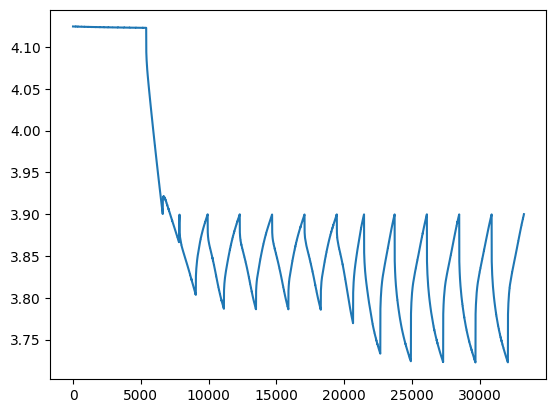

In [246]:
df_res['Voltage(V)'].plot()

In [70]:
max(df_res['Voltage(V)'])

4.1245

<Axes: >

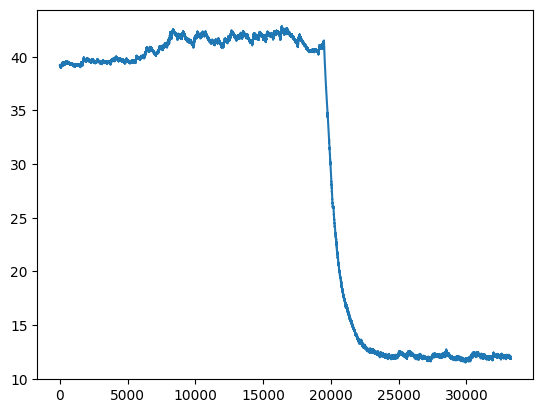

In [71]:
df_res['Temp(degC)'].plot()

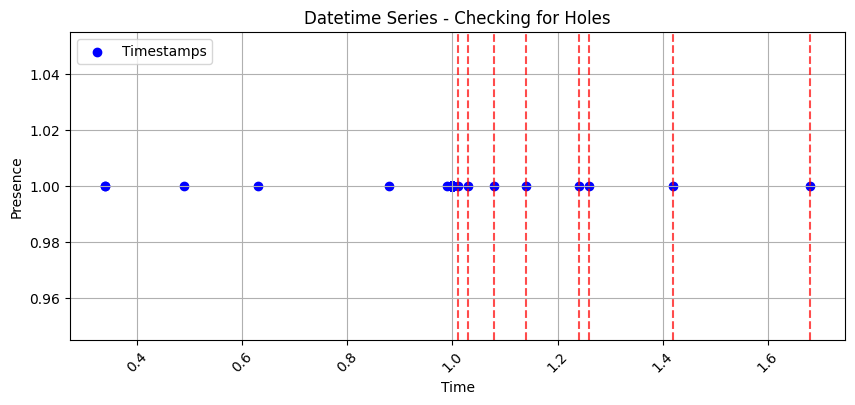

In [268]:
seconds = df_res['Time'].diff().dt.total_seconds()

# Plot datetime points to visualize gaps
plt.figure(figsize=(10, 4))
plt.scatter(seconds, [1] * len(seconds), color='blue', marker='o', label="Timestamps")
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Presence")
plt.title("Datetime Series - Checking for Holes")
plt.legend()
plt.grid()

# Highlight missing intervals
gaps = seconds > 1  # Assuming 60 seconds as threshold for gaps
for i, row in enumerate(gaps):
    if row == True:
        plt.axvline(seconds[i], color='red', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
gaps